<a href="https://colab.research.google.com/github/AdrianOlazaran/IA_IB_AgoDec2024/blob/main/Final_Project_Team4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team details

* Diego Alberto Quiroz Rodríguez 2021240
* Adrián Emiliano Olazarán Guzmán 1901957
* André Nolasco Vincent 2013387
* Alejandro de Jesús Guerrero Maynes 2109308

Team 4

## Artificial Intelligence final project

## Introduction to the project

Nowadays, Convolutional Neural Networks (CNNs) have revolutionized image analysis, especially in critical areas such as medicine. These architectures allow for processing large volumes of images and extracting relevant patterns for classification and diagnosis tasks. The goal of this activity is to train a CNN model using a medical image dataset from Kaggle. This final project will help develop skills in data handling, image preprocessing, and the implementation of deep learning models focused on the medical field.

Three datasets are suggested: MRI images related to Alzheimer’s, brain tumor detection, and chest CT scans. Based on one of these datasets, a comprehensive analysis will be conducted, covering preprocessing, dataset splitting into training and test sets, CNN model training, and performance evaluation.

## Libraries

In [1]:
# Load libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from zipfile import ZipFile

## Extraction of data

In [3]:
# Define the dataset path (update with your dataset path from Kaggle)
dataset_path = "/pia/archive.zip"  # Path

# Verify that the file exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"The file {dataset_path} does not exist. Please verify the path.")

# Extract the dataset
extracted_path = "/content/dataset"  # Path where the dataset will be extracted
if not os.path.exists(extracted_path):
    os.makedirs(extracted_path)

with ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Define directories for training and testing
base_dir = os.path.join(extracted_path, "Data")  # Adjusts according to the structure of the dataset
if not os.path.exists(base_dir):
    raise FileNotFoundError(f"The directory {base_dir} does not exist. Verify the extracted dataset structure.")

## Preprocessing

In [4]:
# Preprocessing: Load and prepare images
datagen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.2)  # Normalize images

# Training data generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 801 images belonging to 3 classes.
Found 199 images belonging to 3 classes.


## Structure and training of Convolutional Artificial Neural Network (CNN)

In [5]:
# CNN model definition
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6547 - loss: 0.6578 - val_accuracy: 0.9196 - val_loss: 0.3367
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8163 - loss: 0.2433 - val_accuracy: 0.9246 - val_loss: -0.1770
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8427 - loss: 0.1245 - val_accuracy: 0.9246 - val_loss: -0.9362
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8369 - loss: -0.7026 - val_accuracy: 0.9196 - val_loss: -2.4440
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8388 - loss: -1.3506 - val_accuracy: 0.9196 - val_loss: -12.2634
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8301 - loss: -15.4355 - val_accuracy: 0.9196 - val_loss: -65.4618
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8127 - loss: -41.0166 - val_accuracy: 0.9246 - val_loss: -261.8892
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8197 - loss: -203.9682 - val_accuracy: 0.9196 - v

## CNN Accuracy Results

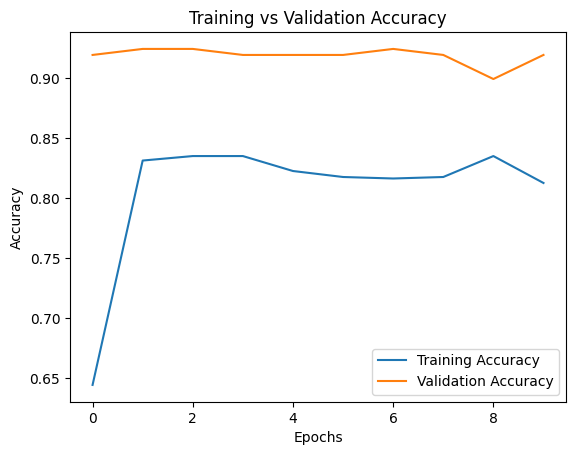

In [6]:
# Plot training accuracy vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

## Predictions with the trained CNN

In [7]:
# Generate 10 predictions
test_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary',
    shuffle=False  # Ensure consistency for predictions
)

predictions = model.predict(test_generator)
for i in range(10):
    predicted_label = 'Infected' if predictions[i] > 0.5 else 'Normal'
    actual_label = 'Infected' if test_generator.classes[i] == 1 else 'Normal'
    print(f"Prediction: {predicted_label}, Actual: {actual_label}")

Found 1000 images belonging to 3 classes.
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step
Prediction: Infected, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal
Prediction: Normal, Actual: Normal


## References

1. https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images